In [1]:
# Base library imports
import colorsys
import os
import re

# Module imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Quick pathfix required before loading project resources
try:
    notebook_location
except NameError:
    notebook_location = os.getcwd()
    os.chdir(re.sub(r'(DSC672)[\\/].*', r'\1', notebook_location))

# Project imports (none just yet)

In [2]:
def display_full_df(df):
    """
    Utility function to display a data frame in full
    """
    with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.width', None):
        display(df)


def create_hist_agg(prefix, bins):
    """
    Utility function to aggregate histogram data
    """
    result = dict()
    for i in range(bins):
        result['%s%s' % (prefix, i)] = 'sum'
    return result


def create_hue_colors(bins, s=1., v=1.):
    """
    Utility function to create a list of colors in the HSV space stepping the H value
    from zero to one given the number of bins, S-value, and V-value.
    """
    colors = list()
    for i in range(bins):
        rgb_float = colorsys.hsv_to_rgb(float(i * 8)/255., s, v)
        rgb = [0, 0, 0]
        rgb[0] = int(rgb_float[0]*255)
        rgb[1] = int(rgb_float[1]*255)
        rgb[2] = int(rgb_float[2]*255)
        colors.append('#%02x%02x%02x' % (rgb[0], rgb[1], rgb[2]))
    return colors

## Quick Preview of the Training and Testing Data Summaries

In [3]:
data_summary_df = pd.read_csv('temp_data/sample_image_aggregation.csv')
display(data_summary_df)

,tile_id,catalog,size,collection,map,tile,x,y,zoom,map_pixels,...,v23,v24,v25,v26,v27,v28,v29,v30,v31,building_pixels
0,sample_nia_825a50_76,sample,256,nia,825a50,76,265068,242181,19,13721,...,1166,626,576,592,766,2012,1974,800,121,0
1,sample_nia_825a50_119,sample,256,nia,825a50,119,265065,242185,19,37397,...,1347,1198,1377,1539,1809,1982,2276,2259,2319,538
2,sample_nia_825a50_25,sample,256,nia,825a50,25,265068,242176,19,3732,...,34,69,162,267,541,847,841,310,58,0
3,sample_nia_825a50_157,sample,256,nia,825a50,157,265062,242192,19,20221,...,82,146,228,321,220,82,44,42,111,0
4,sample_nia_825a50_111,sample,256,nia,825a50,111,265057,242185,19,6251,...,11,18,20,25,21,15,28,24,43,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,sample_nia_825a50_132,sample,256,nia,825a50,132,265061,242187,19,65536,...,1884,2064,2180,1964,2621,2933,1549,942,275,4
156,sample_nia_825a50_59,sample,256,nia,825a50,59,265062,242180,19,65536,...,781,880,1195,1214,1374,320,23,0,0,0
157,sample_nia_825a50_61,sample,256,nia,825a50,61,265064,242180,19,65536,...,1662,1833,2111,2132,2465,2192,1462,809,3157,10383
158,sample_nia_825a50_37,sample,256,nia,825a50,37,265061,242178,19,65536,...,1981,3548,5883,7807,4706,466,13,0,0,0


# Building and Map Pixels: Percentage Building Coverage
The first portion of the exploratory analysis focuses on the percentage of pixels in the training data that are classified as buildings.

## Building and Map Pixels Broken Down by Map

In [4]:
map_summary_df = data_summary_df.groupby(['catalog', 'collection', 'map']).agg({
    'tile': ['count'],
    'map_pixels': ['sum'],
    'building_pixels': ['sum']
})
map_summary_df['percent_building'] = map_summary_df['building_pixels']['sum'].astype(float) / \
    map_summary_df['map_pixels']['sum'].astype(float)
display_full_df(map_summary_df)

,,,tile,map_pixels,building_pixels,percent_building
,,,count,sum,sum,
catalog,collection,map,,,,
sample,nia,825a50,160,8157085,359385,0.044058


## Building and Map Pixels Broken Down by Collection

In [5]:
collection_summary_df = data_summary_df.groupby(['catalog', 'collection']).agg({
    'tile': ['count'],
    'map_pixels': ['sum'],
    'building_pixels': ['sum']
})
collection_summary_df['percent_building'] = collection_summary_df['building_pixels']['sum'].astype(float) / \
    collection_summary_df['map_pixels']['sum'].astype(float)
display_full_df(collection_summary_df)

,,tile,map_pixels,building_pixels,percent_building
,,count,sum,sum,
catalog,collection,,,,
sample,nia,160,8157085,359385,0.044058


## Building and Map Pixels Broken Down by Catalog

In [6]:
catalog_summary_df = data_summary_df.groupby(['catalog']).agg({
    'tile': ['count'],
    'map_pixels': ['sum'],
    'building_pixels': ['sum']
})
catalog_summary_df['percent_building'] = catalog_summary_df['building_pixels']['sum'].astype(float) / \
    catalog_summary_df['map_pixels']['sum'].astype(float)
display_full_df(catalog_summary_df)

,tile,map_pixels,building_pixels,percent_building
,count,sum,sum,
catalog,,,,
sample,160,8157085,359385,0.044058


## Building and Map Pixels For Entire Training Data Set

In [7]:
train_summary_df = data_summary_df.agg({
    'tile': ['count'],
    'map_pixels': ['sum'],
    'building_pixels': ['sum']
})
train_summary_df['percent_building'] = train_summary_df['building_pixels']['sum'].astype(float) / \
    train_summary_df['map_pixels']['sum'].astype(float)
display(train_summary_df)

,tile,map_pixels,building_pixels,percent_building
count,160.0,NaN,NaN,0.044058
sum,NaN,8157085.0,359385.0,0.044058


# Pixel Color-Component Analysis

In [8]:
tier_r_histogram = data_summary_df.groupby(['catalog']).agg(create_hist_agg('r', 32))
tier_g_histogram = data_summary_df.groupby(['catalog']).agg(create_hist_agg('g', 32))
tier_b_histogram = data_summary_df.groupby(['catalog']).agg(create_hist_agg('b', 32))
tier_h_histogram = data_summary_df.groupby(['catalog']).agg(create_hist_agg('h', 32))
tier_s_histogram = data_summary_df.groupby(['catalog']).agg(create_hist_agg('s', 32))
tier_v_histogram = data_summary_df.groupby(['catalog']).agg(create_hist_agg('v', 32))

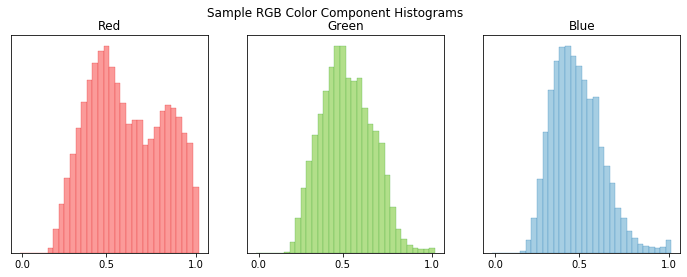

In [9]:
fig, axs = plt.subplots(1,3, figsize=(12,4))
axs[0].set_title('Red')
axs[0].bar(x=range(0,32), height=tier_r_histogram.iloc[0].values, width=1.,
              color='#fb9a99', edgecolor='#e31a1c', linewidth=0.25)
axs[1].set_title('Green')
axs[1].bar(x=range(0,32), height=tier_g_histogram.iloc[0].values, width=1.,
              color='#b2df8a', edgecolor='#33a02c', linewidth=0.25)
axs[2].set_title('Blue')
axs[2].bar(x=range(0,32), height=tier_b_histogram.iloc[0].values, width=1.,
              color='#a6cee3', edgecolor='#1f78b4', linewidth=0.25)
plt.setp(axs, yticks=[], xticks=[0, 15, 31], xticklabels=['0.0', '0.5', '1.0'])
fig.suptitle('Sample RGB Color Component Histograms')
plt.show()

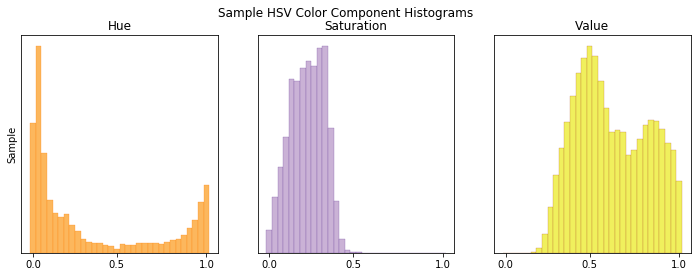

In [10]:
fig, axs = plt.subplots(1,3, figsize=(12,4))
axs[0].set_ylabel('Sample')
axs[0].set_title('Hue')
axs[0].bar(x=range(0,32), height=tier_h_histogram.iloc[0].values, width=1.,
              color='#fcb75d', edgecolor='#ff7f00', linewidth=0.25)
axs[1].set_title('Saturation')
axs[1].bar(x=range(0,32), height=tier_s_histogram.iloc[0].values, width=1.,
              color='#cab2d6', edgecolor='#6a3d9a', linewidth=0.25)
axs[2].set_title('Value')
axs[2].bar(x=range(0,32), height=tier_v_histogram.iloc[0].values, width=1.,
              color='#f0f05d', edgecolor='#b15928', linewidth=0.25)
plt.setp(axs, yticks=[], xticks=[0, 15, 31], xticklabels=['0.0', '0.5', '1.0'])
fig.suptitle('Sample HSV Color Component Histograms')
plt.show()

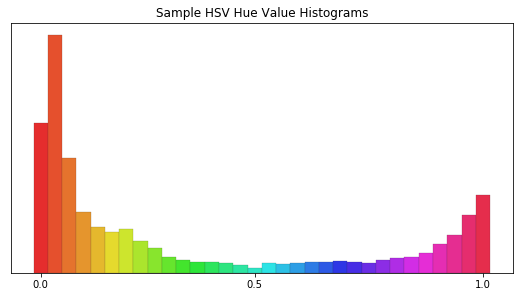

In [11]:
fig, axs = plt.subplots(1,1, figsize=(9,5))
axs.bar(x=range(0,32), height=tier_h_histogram.iloc[0].values, width=1.,
              color=create_hue_colors(32, 0.8, 0.9), edgecolor=create_hue_colors(32, 0.66, 0.5), linewidth=0.25)
plt.setp(axs, yticks=[], xticks=[0, 15, 31], xticklabels=['0.0', '0.5', '1.0'])
axs.set_title('Sample HSV Hue Value Histograms')
plt.subplots_adjust(top=.82)
plt.show()